In [4]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Librariest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import StratifiedShuffleSplit

# Feature selection
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE


In [5]:
data1 = pd.read_csv('raw_data/creditcard.csv')
data1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df = data1.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
print(df["Time"].min())
print(df["Time"].max())

0.0
172792.0


In [10]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
df['Hour'] = (df['Time'] // 3600) % 24

In [12]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0


In [13]:
df["Hour"].value_counts()

Hour
21.0    17703
18.0    17039
11.0    16856
20.0    16756
10.0    16598
14.0    16570
15.0    16461
16.0    16453
17.0    16166
9.0     15838
19.0    15649
22.0    15441
12.0    15420
13.0    15365
23.0    10938
8.0     10276
0.0      7695
7.0      7243
1.0      4220
6.0      4101
3.0      3492
2.0      3328
5.0      2990
4.0      2209
Name: count, dtype: int64

In [14]:
df.isnull().sum().max()

0

In [15]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [16]:
print('Not Fraud', round(df['Class'].value_counts()[0]/len(df) * 100,2))
print('Fraud', round(df['Class'].value_counts()[1]/len(df) * 100,2))

Not Fraud 99.83
Fraud 0.17


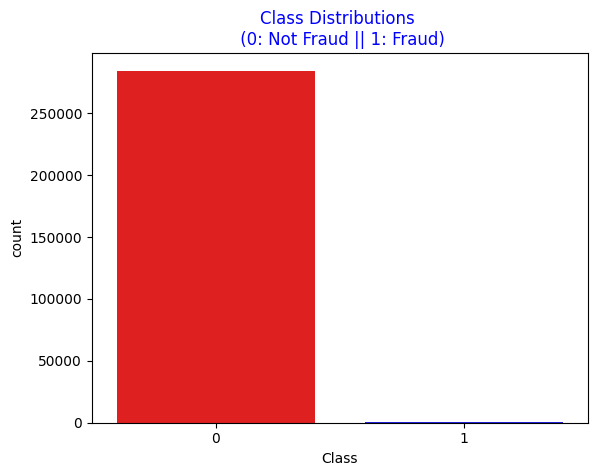

In [17]:
sns.countplot(x='Class', data=df, palette=["red", "blue"])
plt.title('Class Distributions \n (0: Not Fraud || 1: Fraud)', fontsize=12, color="Blue")
plt.show()

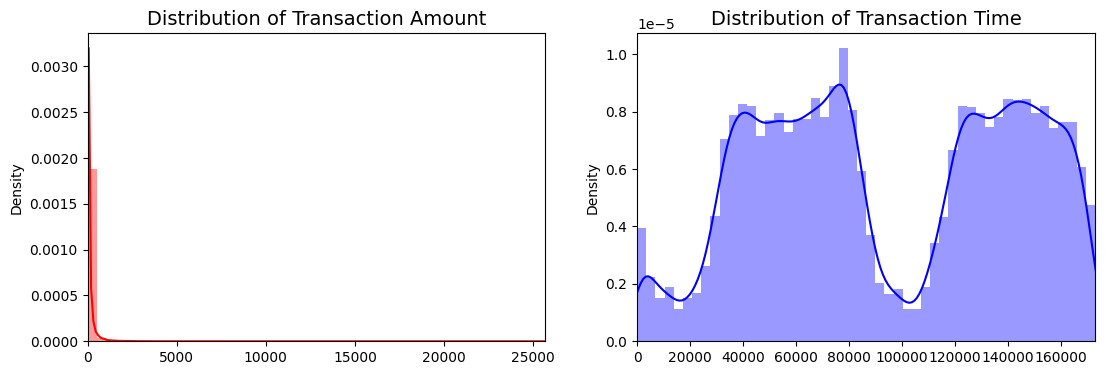

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(13,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])


plt.show()

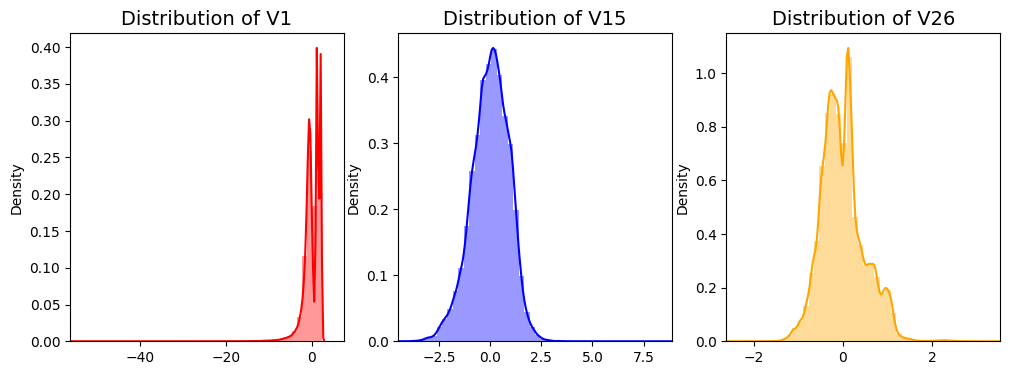

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))
V1_values = df["V1"].values
V15_values = df["V15"].values
V26_values = df["V26"].values

sns.distplot(V1_values, ax=ax[0], color="red")
ax[0].set_title('Distribution of V1', fontsize=14)
ax[0].set_xlim([min(V1_values), max(V1_values)*3])

sns.distplot(V15_values, ax=ax[1], color="blue")
ax[1].set_title('Distribution of V15', fontsize=14)
ax[1].set_xlim([min(V15_values), max(V15_values)])

sns.distplot(V26_values, ax=ax[2], color="orange")
ax[2].set_title('Distribution of V26', fontsize=14)
ax[2].set_xlim([min(V26_values), max(V26_values)])

plt.show()


Class distribution after SMOTE:
 Class
0    227451
1     45490
Name: count, dtype: int64


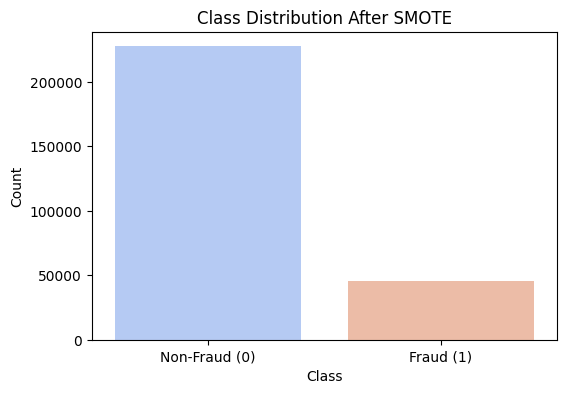

In [20]:
# Separate features and target variable
X = df.drop(columns=['Class'])
y = df['Class']

# Split data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training set
smote = SMOTE(sampling_strategy=0.2, random_state=42)  # Adjust ratio if needed
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("\nClass distribution after SMOTE:\n", pd.Series(y_train_smote).value_counts())

# Plot new class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=pd.Series(y_train_smote).value_counts().index,
            y=pd.Series(y_train_smote).value_counts().values, palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["Non-Fraud (0)", "Fraud (1)"])
plt.ylabel("Count")
plt.title("Class Distribution After SMOTE")
plt.show()

In [21]:
y_train_smote.value_counts()[0]/len(y_train_smote)

0.8333339439659121

In [22]:
y_train_smote.value_counts()[1]/len(y_train_smote)

0.16666605603408796

In [23]:
print('Not Fraud', round(pd.Series(y_train_smote).value_counts()[0]/len(y_train) * 100,2))
print('Fraud', round(pd.Series(y_train_smote).value_counts()[1]/len(y_train) * 100,2))

Not Fraud 99.83
Fraud 19.97


In [24]:

# Initialize RobustScaler
scaler = RobustScaler()

# Apply scaling only to 'Time' and 'Amount'
X_train_smote[['Time', 'Amount']] = scaler.fit_transform(X_train_smote[['Time', 'Amount']])
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])

# Check transformed statistics
print("\nScaled 'Time' and 'Amount' statistics:\n", X_train_smote[['Time', 'Amount']].describe())


Scaled 'Time' and 'Amount' statistics:
                 Time         Amount
count  272941.000000  272941.000000
mean        0.101001       0.845092
std         0.554522       2.993418
min        -0.976962      -0.286191
25%        -0.370725      -0.224555
50%         0.000000       0.000000
75%         0.629275       0.775445
max         1.028493     317.045331


In [25]:
# Log transform the 'Amount' column to reduce skewness
X_train_smote['Log_Amount'] = np.log1p(X_train_smote['Amount'])
X_test['Log_Amount'] = np.log1p(X_test['Amount'])

# Drop the original 'Amount' column if needed
X_train_smote.drop(columns=['Amount'], inplace=True)
X_test.drop(columns=['Amount'], inplace=True)

# Check the new features
print(X_train_smote.head())


       Time        V1        V2        V3        V4        V5        V6  \
0  0.902299  1.946747 -0.752526 -1.355130 -0.661630  1.502822  4.024933   
1  0.467741  2.035149 -0.048880 -3.058693  0.247945  2.943487  3.298697   
2 -0.498892 -0.991920  0.603193  0.711976 -0.992425 -0.825838  1.956261   
3  0.562296  2.285718 -1.500239 -0.747565 -1.668119 -1.394143 -0.350339   
4 -0.288031 -0.448747 -1.011440  0.115903 -3.454854  0.715771 -0.147490   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0 -1.479661  1.139880  1.406819  ...  0.076197  0.297537  0.307915  0.690980   
1 -0.002192  0.674782  0.045826  ...  0.038628  0.228197  0.035542  0.707090   
2 -2.212603 -5.037523  0.000772  ... -2.798352  0.109526 -0.436530 -0.932803   
3 -1.427984  0.010010 -1.118447  ... -0.139670  0.077013  0.208310 -0.538236   
4  0.504347 -0.113817 -0.044782  ... -0.243245 -0.173298 -0.006692 -1.362383   

        V25       V26       V27       V28  Hour  Log_Amount  
0 -0.3

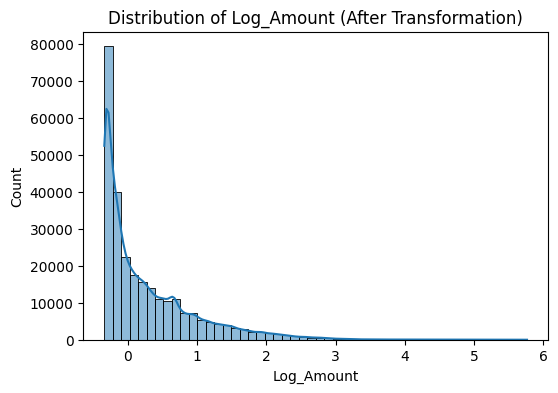

In [26]:
# Plot the distribution of Log_Amount
plt.figure(figsize=(6, 4))
sns.histplot(X_train_smote['Log_Amount'], bins=50, kde=True)
plt.title("Distribution of Log_Amount (After Transformation)")
plt.show()

## sine and cosine encoding to capture the cyclical nature

In [27]:

# Apply cyclical transformation
X_train_smote["Hour_sin"] = np.sin(2 * np.pi * X_train_smote["Hour"] / 24)
X_train_smote["Hour_cos"] = np.cos(2 * np.pi * X_train_smote["Hour"] / 24)

X_test["Hour_sin"] = np.sin(2 * np.pi * X_test["Hour"] / 24)
X_test["Hour_cos"] = np.cos(2 * np.pi * X_test["Hour"] / 24)


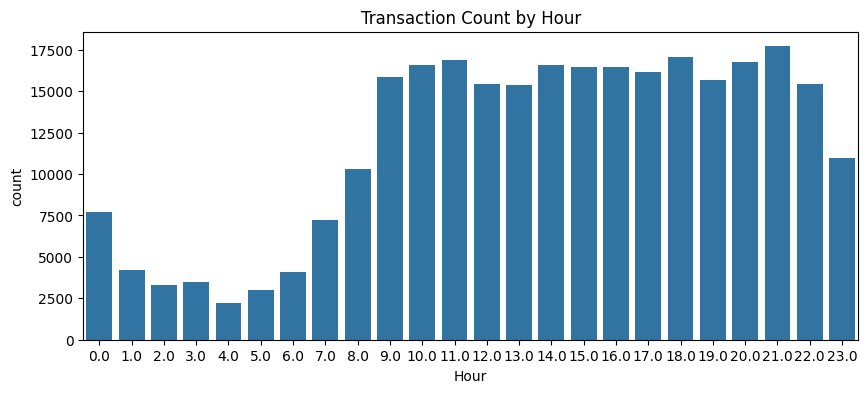

In [28]:
# Plot the number of transactions by Hour
plt.figure(figsize=(10, 4))
sns.countplot(x=df['Hour'])
plt.title("Transaction Count by Hour")
plt.show()

### Drop the original Hour column since it's no longer needed:

In [29]:
X_train_smote.drop(columns=["Hour"], inplace=True)
X_test.drop(columns=["Hour"], inplace=True)


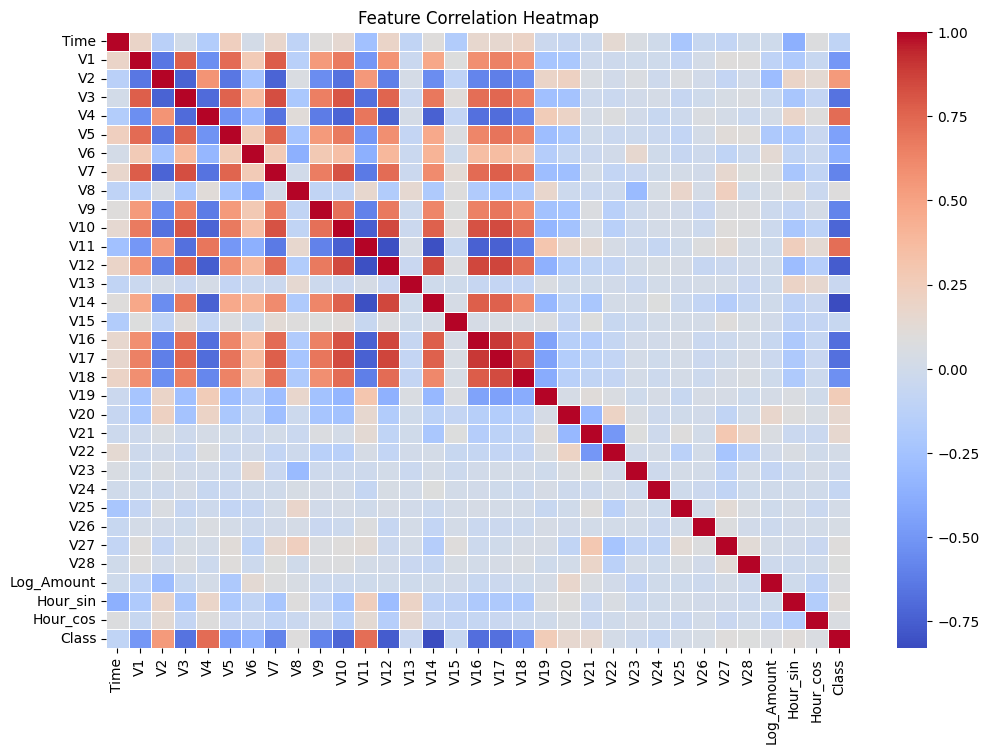

In [30]:
X_train_smote['Class'] = y_train_smote

# Compute correlation matrix
correlation_matrix = X_train_smote.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [31]:

# Compute correlation with fraud target
corr = X_train_smote.corr()['Class'].sort_values(ascending=False)

# Show top 10 most correlated features
print("\nTop 20 Most Correlated Features with Fraud:\n", corr.head(25))



Top 20 Most Correlated Features with Fraud:
 Class         1.000000
V4            0.722671
V11           0.720326
V2            0.536272
V19           0.258934
V21           0.156033
V20           0.155331
Hour_sin      0.104447
V27           0.094824
V8            0.090427
V28           0.081518
Log_Amount    0.065768
Hour_cos      0.060504
V26           0.038414
V22           0.015707
V25           0.014475
V23          -0.020240
V13          -0.045972
V15          -0.051664
V24          -0.064893
Time         -0.094894
V6           -0.356817
V5           -0.443242
V1           -0.493908
V18          -0.532043
Name: Class, dtype: float64


## 1️⃣ Drop Low-Correlation Features
If a feature has very low correlation (< |0.05|), it might not help much in the model.
Candidates to drop:

V26 (0.038)

V22 (0.015)

V25 (0.014)  

V23 (-0.020)

V13 (-0.045)


Time (-0.094) (since it's redundant after extracting Hour)

In [32]:
# Drop low-correlation features
low_corr_features = ['V26', 'V22', 'V25', 'V23', 'V13', 'Time']
X_train_smote.drop(columns=low_corr_features, inplace=True)
X_test.drop(columns=low_corr_features, inplace=True)

print("Final shape of training data:", X_train_smote.shape)
print("Final shape of test data:", X_test.shape)


Final shape of training data: (272941, 27)
Final shape of test data: (56962, 26)


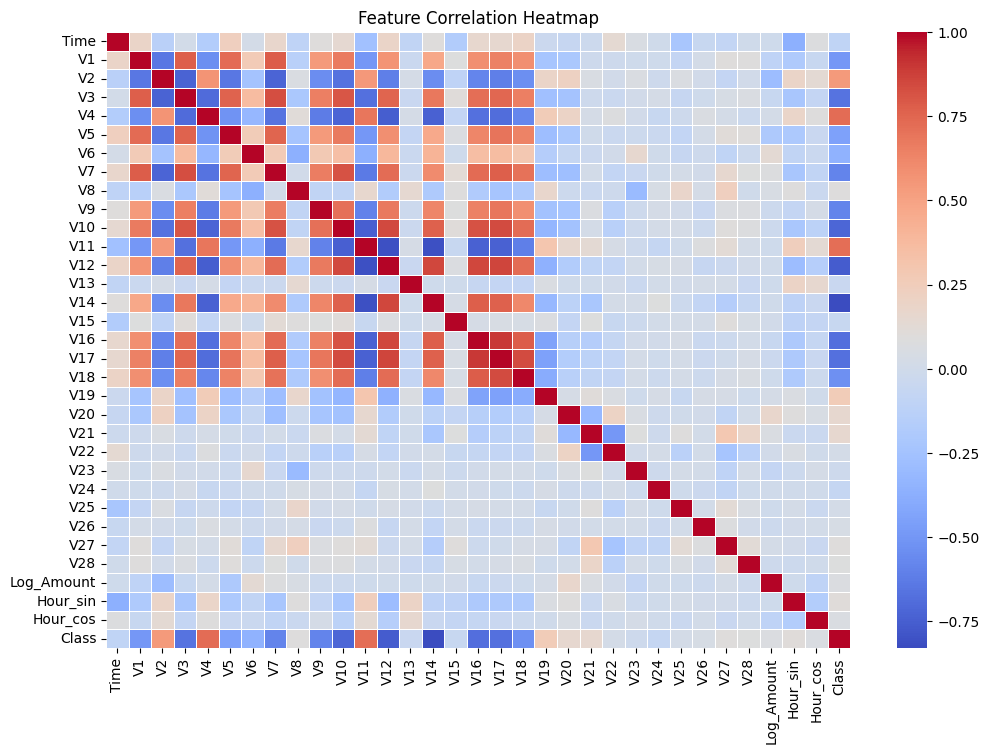

[('V14', 'V12'), ('V16', 'V12'), ('V17', 'V12'), ('V17', 'V16')]
V!2, V14, V16,V17

## 🔍 Key Insights from the Heatmap
Diagonal Line:

The strong red diagonal represents each feature’s perfect correlation with itself (1.0 correlation).
Highly Correlated Features:

Features like V4, V11, and V2 show strong correlation with fraud (confirming our previous findings).

Some features (like V10-V15) seem to be highly correlated with each other (potential multicollinearity).

Weak or Negative Correlation Features:

Some features show little to no correlation (grayish-blue colors), making them potential candidates for removal.

## 🛠 What Should You Do Next?

✅ 1️⃣ Remove Highly Correlated Features (Multicollinearity Check)

Features that are highly correlated with each other (>|0.85|) can cause issues for models like Logistic Regression & SVM.

We should check for feature pairs with high correlation and drop one of them.

In [33]:
X_train_smote2 = X_train_smote.copy()

In [34]:
# Compute the absolute correlation with the target column
target_corr = correlation_matrix['Class'].abs()

# Select upper triangle of correlation matrix to avoid redundancy
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find pairs of features with correlation greater than 0.85
high_corr_pairs = []
for column in upper.columns:
    high_corr_pairs += [(column, other) for other in upper.index if upper[column][other] > 0.85]

# For each pair of highly correlated features, drop the one with lower correlation to the target
columns_to_drop = []
for feature1, feature2 in high_corr_pairs:
    if abs(target_corr[feature1]) < abs(target_corr[feature2]):
        columns_to_drop.append(feature1)
    else:
        columns_to_drop.append(feature2)

# Drop the selected columns from X_train_smote
X_train_smote.drop(columns=columns_to_drop, inplace=True)

# Print the results
print("Dropped features:", columns_to_drop)
print("Final shape of dataset:", X_train_smote.shape)

Dropped features: ['V12', 'V16', 'V17', 'V17']
Final shape of dataset: (272941, 24)


In [35]:
high_corr_pairs

[('V14', 'V12'), ('V16', 'V12'), ('V17', 'V12'), ('V17', 'V16')]

Dropped features: ['V12', 'V16', 'V17', 'V17']
Final shape of dataset: (272941, 24)

In [36]:
X_train_smote.drop(columns=['Class'], inplace=True)

In [37]:
X_train_smote.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V18,V19,V20,V21,V24,V27,V28,Log_Amount,Hour_sin,Hour_cos
0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,...,0.141938,-0.451365,-0.134435,0.076197,0.690980,0.077641,-0.032248,-0.217877,-8.660254e-01,0.500000
1,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,...,-0.695698,-0.274411,-0.227279,0.038628,0.707090,0.002520,-0.069002,-0.286694,5.000000e-01,-0.866025
2,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,...,0.147255,0.004631,1.280856,-2.798352,-0.932803,0.038049,0.185340,1.056611,2.588190e-01,-0.965926
3,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,...,0.768237,0.257424,-0.490642,-0.139670,-0.538236,0.018045,-0.063005,-0.236792,1.224647e-16,-1.000000
4,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,...,1.597589,-0.082746,-0.275297,-0.243245,-1.362383,-0.032580,-0.064194,0.575094,-8.660254e-01,-0.500000


In [38]:
y_train_smote.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [39]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V18,V19,V20,V21,V24,V27,V28,Log_Amount,Hour_sin,Hour_cos
263020,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,...,-0.392568,-0.162648,0.394322,0.080084,0.707899,0.533837,0.291319,-0.002102,-0.866025,0.500000
11378,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,...,1.058898,0.397057,-0.515765,-0.295555,0.042996,0.110802,-0.511938,-0.150616,0.965926,0.258819
147283,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,...,-1.231804,0.098738,2.034786,-1.060151,-1.483996,0.552411,0.509764,0.502839,0.000000,1.000000
219439,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,...,-1.008531,0.097040,-0.192024,-0.281684,-0.067584,-0.063621,-0.060077,-0.320154,-0.707107,-0.707107
36939,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,...,1.040947,-1.045263,0.009083,-0.164015,0.619449,0.046884,0.104527,-0.311515,0.500000,-0.866025


In [40]:
# Recalculate correlation matrix after dropping features
correlation_matrix_updated = X_train_smote.corr()

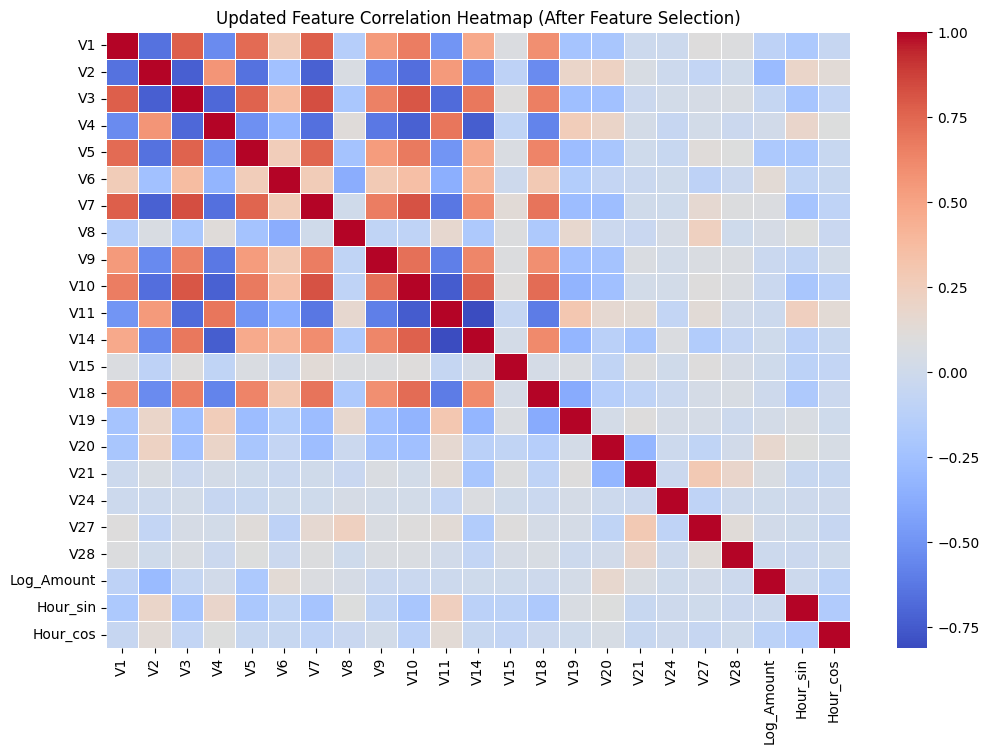

In [41]:
# Plot the updated heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_updated, cmap="coolwarm", linewidths=0.5)
plt.title("Updated Feature Correlation Heatmap (After Feature Selection)")
plt.show()

In [42]:
correlation_matrix_updated.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V14', 'V15', 'V18', 'V19', 'V20', 'V21', 'V24', 'V27', 'V28',
       'Log_Amount', 'Hour_sin', 'Hour_cos'],
      dtype='object')

Variance Values (Descending Order):
V3            17.392065
V1            13.939323
V7            13.738880
V14           10.029241
V10            9.155605
V8             8.295250
V5             7.610758
V2             6.970376
V4             5.850281
V11            3.942699
V9             2.824578
V21            2.581306
V18            2.509147
V6             2.246742
V19            0.914772
V15            0.851109
V20            0.762183
Hour_cos       0.490670
Log_Amount     0.467287
Hour_sin       0.439110
V27            0.395758
V24            0.341185
V28            0.129371
dtype: float64


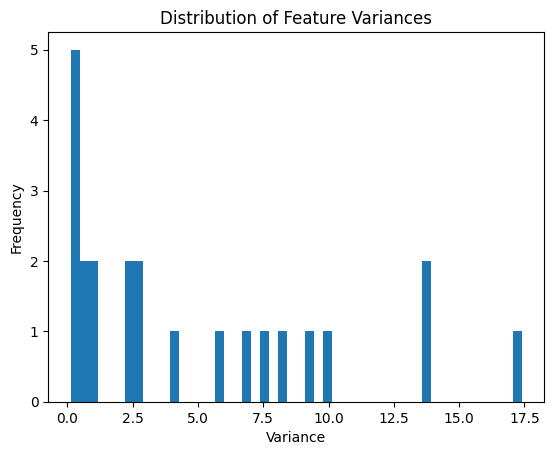

In [63]:
variances = X_train_smote.var() # or X_train_scaled.var() after scaling.

# Sort variances in descending order
sorted_variances = variances.sort_values(ascending=False)

# Print the sorted variance values
print("Variance Values (Descending Order):")
print(sorted_variances)

# Plot the histogram
plt.hist(variances, bins=50)
plt.xlabel("Variance")
plt.ylabel("Frequency")
plt.title("Distribution of Feature Variances")
plt.show()

In [64]:
# 1. Variance Threshold
vt = VarianceThreshold(threshold=1)  # Adjust threshold as needed
X_train_vt = vt.fit_transform(X_train_smote)
selected_vt_features = X_train_smote.columns[vt.get_support()]
X_train_vt = pd.DataFrame(X_train_vt, columns=selected_vt_features)
print("Features after Variance Threshold:", selected_vt_features.tolist())

Features after Variance Threshold: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V14', 'V18', 'V21']


In [65]:
# Find dropped features
dropped_features = [feature for feature in correlation_matrix_updated if feature not in selected_vt_features]

# Print dropped features
if dropped_features:
    print("\nFeatures dropped by Variance Threshold:", dropped_features)
else:
    print("\nNo features were dropped by Variance Threshold.")


Features dropped by Variance Threshold: ['V15', 'V19', 'V20', 'V24', 'V27', 'V28', 'Log_Amount', 'Hour_sin', 'Hour_cos']


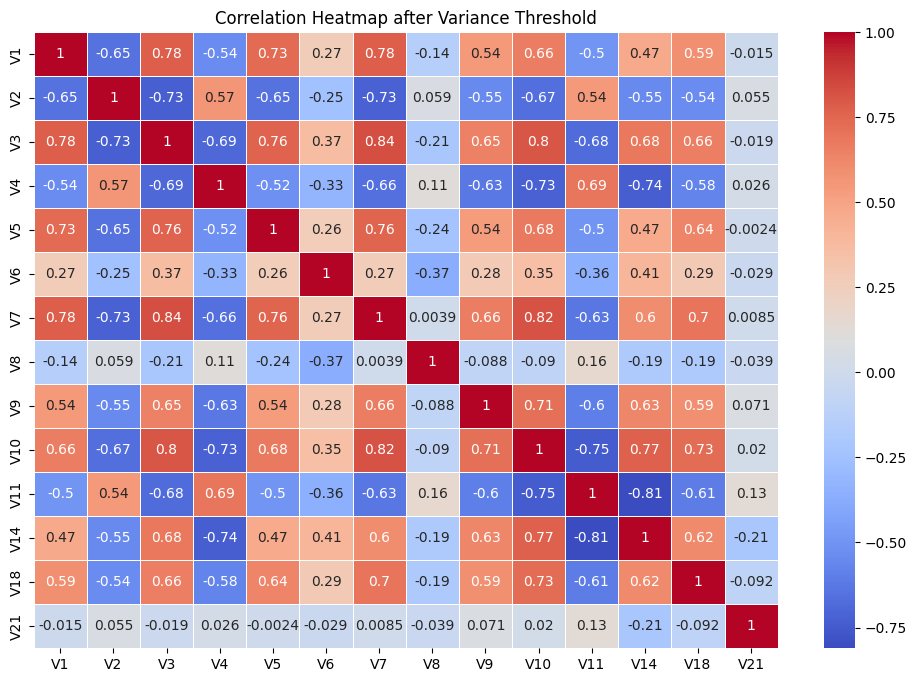

In [67]:
# Plot Heatmap after Variance Threshold
correlation_matrix_vt = X_train_vt.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_vt, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap after Variance Threshold")
plt.show()

In [69]:
# 2. SelectKBest
n_features_vt = X_train_vt.shape[1]  # Get the number of features after VarianceThreshold
k_value = min(10, n_features_vt) # pick 10, or the number of remaining features, which ever is smaller.
k_best = SelectKBest(score_func=f_classif, k=k_value)  # Adjust k to be <= n_features_vt
X_train_kb = k_best.fit_transform(X_train_vt, y_train_smote)
selected_kb_features = X_train_vt.columns[k_best.get_support()]
X_train_kb = pd.DataFrame(X_train_kb, columns=selected_kb_features)
print("Features after SelectKBest:", selected_kb_features.tolist())

Features after SelectKBest: ['V1', 'V2', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V14', 'V18']


In [74]:
# Find dropped features (SelectKBest)
dropped_features_kb = [feature for feature in selected_vt_features if feature not in selected_kb_features]
if dropped_features_kb:
    print("\nFeatures dropped by SelectKBest:", dropped_features_kb)
else:
    print("\nNo features were dropped by SelectKBest.")


Features dropped by SelectKBest: ['V5', 'V6', 'V8', 'V21']


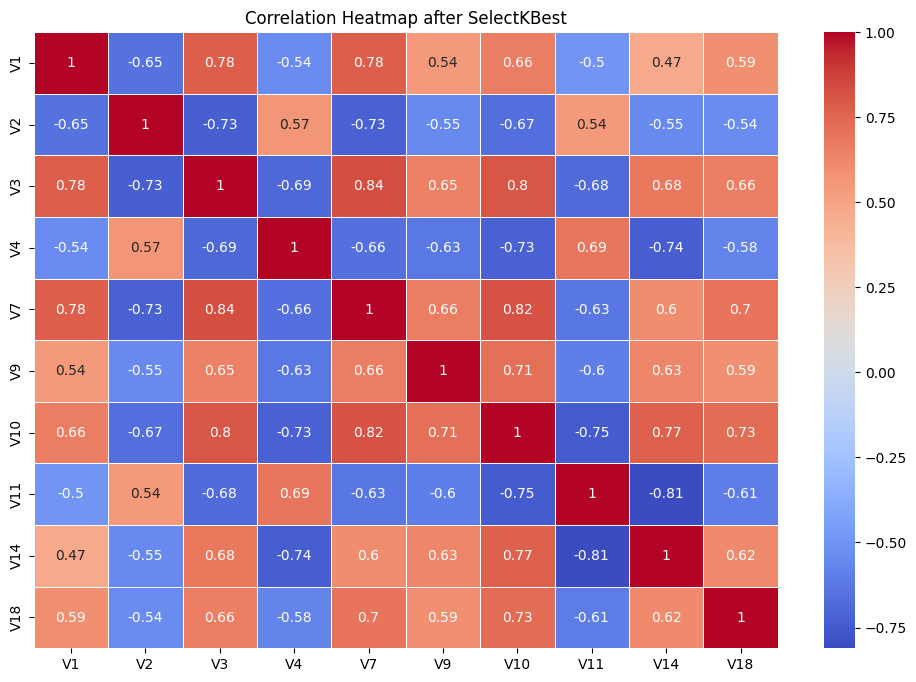

In [76]:
# Plot Heatmap after SelectKBest
correlation_matrix_kb = X_train_kb.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_kb, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap after SelectKBest")
plt.show()

In [77]:
# 3. RFE
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=10) # Adjust n_features_to_select
X_train_rfe = rfe.fit_transform(X_train_kb, y_train_smote)
selected_rfe_features = X_train_kb.columns[rfe.support_]
X_train_rfe = pd.DataFrame(X_train_rfe, columns=selected_rfe_features)
print("Features after RFE:", selected_rfe_features.tolist())

Features after RFE: ['V1', 'V2', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V14', 'V18']


In [72]:
print("Selected features:", X_train_rfe.columns)

Selected features: Index(['V1', 'V2', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V14', 'V18'], dtype='object')


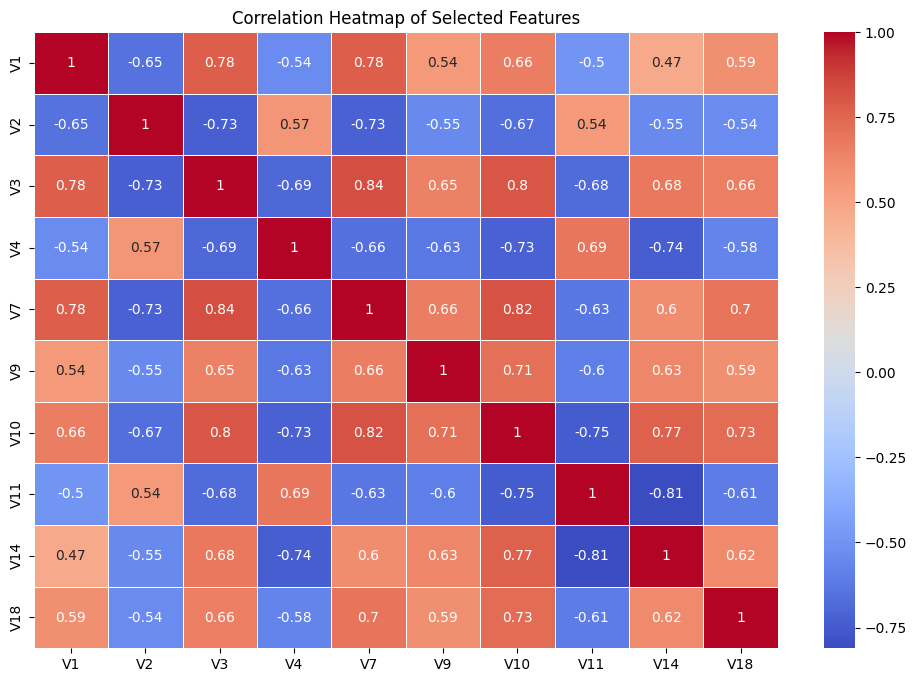

In [73]:
# 4. Plot Heatmap
correlation_matrix = X_train_rfe.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features")
plt.show()